<a href="https://colab.research.google.com/github/Habiba-Arafa/Machine-learning-Models-From-Scratch/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from collections import Counter

In [ ]:
# Load the Iris dataset from scikit-learn and create a pandas DataFrame

iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# split Data into features and target

X= iris_df.drop(columns='target')
y=iris_df['target']

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [ ]:
# Split X and y into training and testing sets with a test size of 20%, shuffling the data, and setting a random state for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,shuffle = True,random_state = 0)

# Convert training and testing sets to NumPy arrays

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


In [ ]:
print (len(X_train))
print (len(X_test))

120
30


In [ ]:
# Standardize the feature data using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X_train[0:5])
print(X_train_scaled[0:5])

[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
[[ 0.61303014  0.10850105  0.94751783  0.736072  ]
 [-0.56776627 -0.12400121  0.38491447  0.34752959]
 [-0.80392556  1.03851009 -1.30289562 -1.33615415]
 [ 0.25879121 -0.12400121  0.60995581  0.736072  ]
 [ 0.61303014 -0.58900572  1.00377816  1.25412853]]


Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

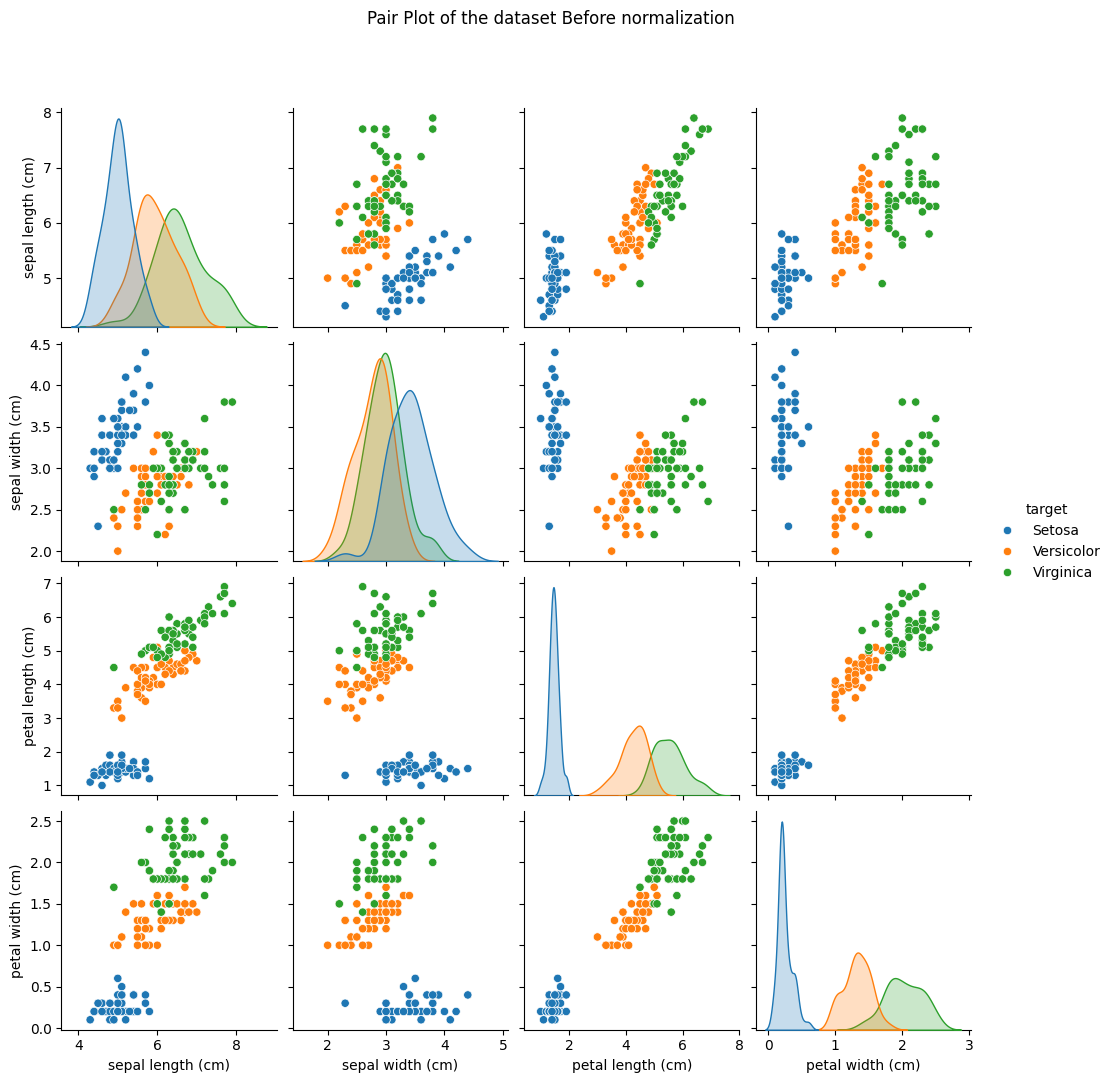

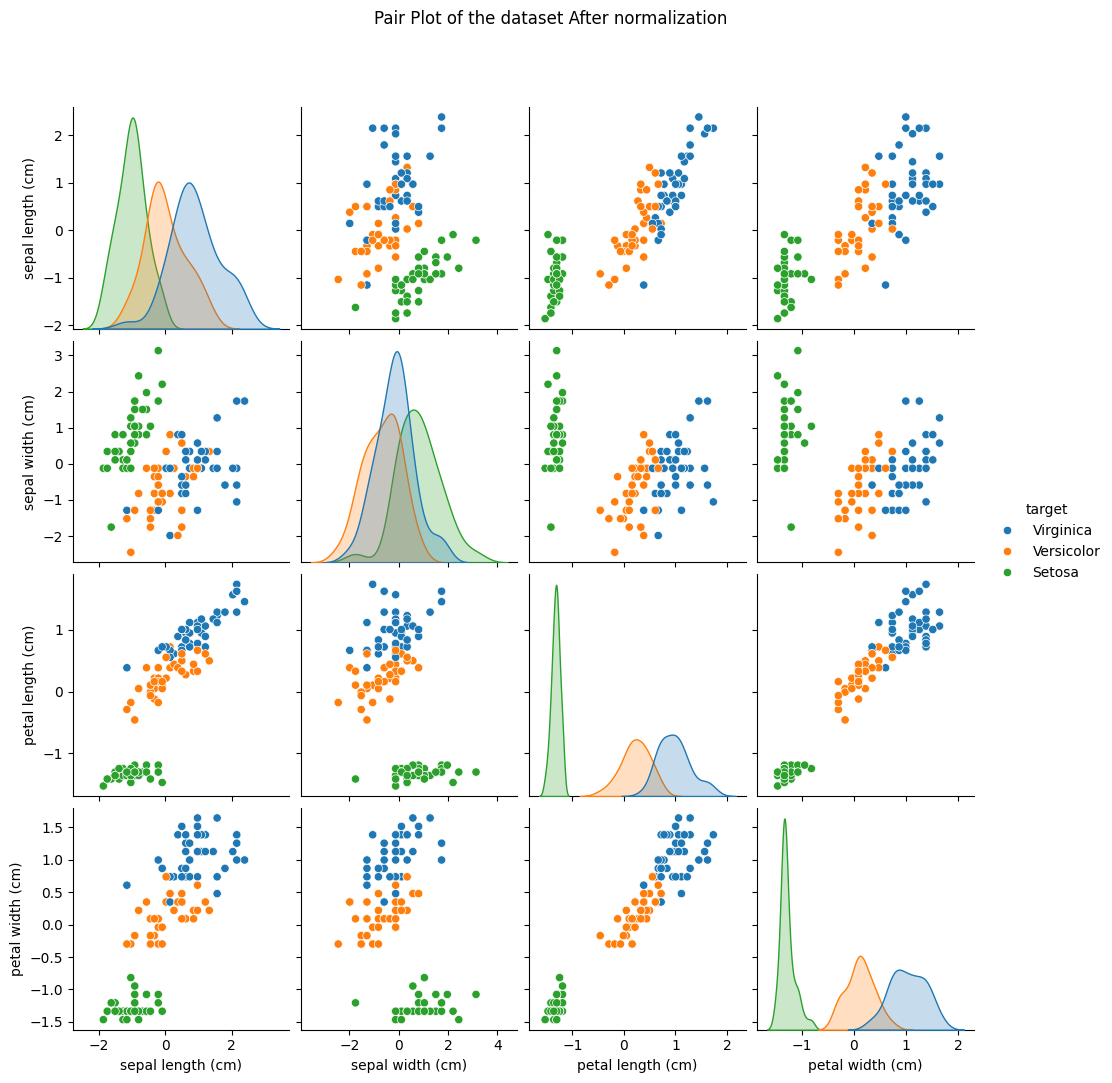

In [ ]:
# Before
replace_index = {0.0: "Setosa", 1.0: "Versicolor", 2.0 : "Virginica"}

before = sns.pairplot(iris_df.replace({"target": replace_index}), hue='target')
before.fig.suptitle("Pair Plot of the dataset Before normalization", y=1.08)

#After
iris_df_2 = pd.DataFrame(data= np.c_[X_train_scaled, y_train],
                          columns = iris['feature_names'] + ['target'] )
replace_index = {0.0: "Setosa", 1.0: "Versicolor", 2.0 : "Virginica"}
after = sns.pairplot(iris_df_2.replace({"target":replace_index}), hue='target')
after.fig.suptitle("Pair Plot of the dataset After normalization", y=1.08)


<Axes: >

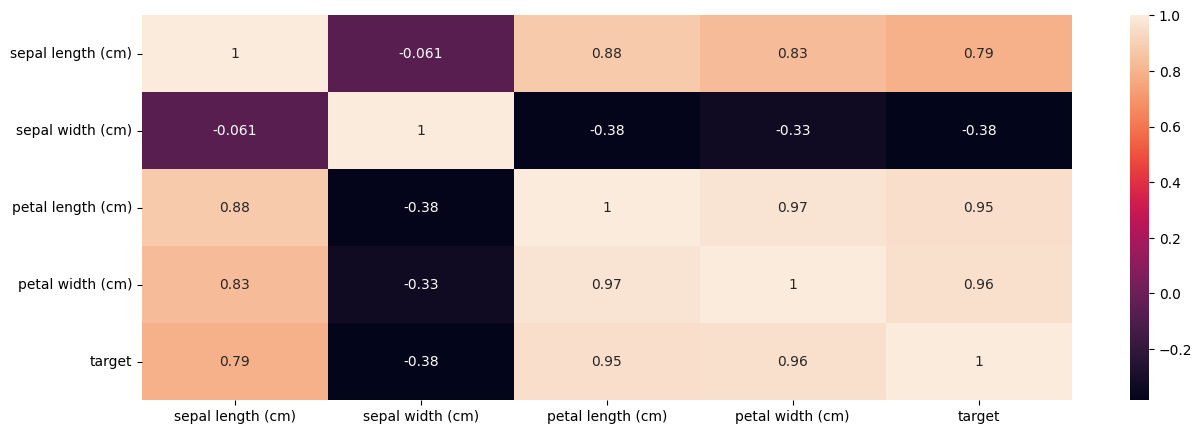

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(iris_df_2.corr(),annot=True)

In [ ]:
def calc_distance(x_train , x_test_point):

    distances = []

    # Calculate Euclidean distance for each point in x_train

    for row in range(len(x_train)):

        current_distance = 0

        for col in range(len( x_train[row])):

            current_distance += ( x_train[row][col] - x_test_point[col])**2

        current_distance = np.sqrt(current_distance)

        distances.append(current_distance)

    distances = pd.DataFrame(data=distances, columns=['index'])
    return distances

In [ ]:
def nearest_neighbors(distances , K):


    df_nearest = distances.sort_values(by=['index'], axis=0)


    df_nearest = df_nearest[:K]
    return df_nearest


In [ ]:
def voting(df_nearest,y_train):

  # Extract labels of the nearest neighbor
  labels = y_train[df_nearest.index]

  # Count occurrences of each label
  counting_dictionary = {}
  max_count =0
  max_label =None

  for label in labels :

    if label in counting_dictionary :

      counting_dictionary[label]+=1
    else:

      counting_dictionary[label]=1

  # Find the label with the maximum count
  for label,count in counting_dictionary.items() :
    if count > max_count :
      max_count = count
      max_label= label

  return max_label




In [ ]:
def knn_test(xtrain,xtest,ytrain,k):

    lists = []

    for test_point in xtest:

        # Calculate distances from the test point to all training points
        distance_point   = calc_distance(xtrain, test_point)
        # Select the K nearest neighbors based on distances
        df_nearest_point = nearest_neighbors(distance_point , K)
        # Perform majority voting to predict the label of the test point
        y_pred_point = voting(df_nearest_point , y_train)
        lists.append(y_pred_point)

    return lists

In [ ]:
K = 3
result = knn_test(X_train_scaled , X_test_scaled, y_train ,K)
print(result)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [ ]:
print(f'The accuracy  is {accuracy_score(y_test, result)}')


The accuracy  is 0.9666666666666667


In [ ]:
K = 3
result = knn_test(X_train , X_test, y_train ,K)
print(result)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [ ]:
print(f'The accuracy  is {accuracy_score(y_test, result)}')


The accuracy  is 0.9666666666666667


In [ ]:
K = 5
result = knn_test(X_train_scaled , X_test_scaled, y_train ,K)
print(result)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [ ]:
print(f'The accuracy  is {accuracy_score(y_test, result)}')


The accuracy  is 1.0


In [ ]:
K = 5
result = knn_test(X_train , X_test, y_train ,K)
print(result)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [ ]:
print(f'The accuracy  is {accuracy_score(y_test, result)}')


The accuracy  is 0.9666666666666667


In [ ]:
K = 7
result = knn_test(X_train_scaled , X_test_scaled, y_train ,K)
print(result)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [ ]:
print(f'The accuracy  is {accuracy_score(y_test, result)}')


The accuracy  is 1.0
